In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


In [28]:
# Load dataset: 28x28 sized images of handwritten numbers from 0 to 9. 
mnist = tf.keras.datasets.mnist

# Get training and test datasets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

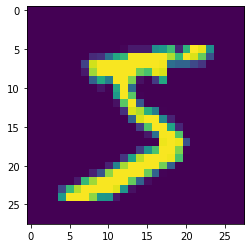

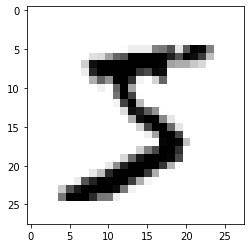

In [29]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap=plt.cm.binary)

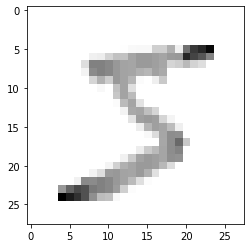

In [30]:
# Normalize data.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)

In [31]:
# Increase dimension by 1 for Convolution kernel operation.
IMG_SIZE = 28

x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [32]:
model = Sequential()

# 1st Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st Fully Connected Layer.
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# 2nd Fully Connected Layer.
model.add(Dense(32))
model.add(Activation("relu"))

# 3rd Fully Connected Layer.
model.add(Dense(10))  # Must be equal to total number of numbers/classes (0-9).
model.add(Activation("softmax"))


In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        